## 1 Import Libraries
The following code is written in Python 3.x. Libraries provide pre-written functionality to perform necessary tasks. The idea is why write ten lines of code, when you can write one line. 

In [1]:
import sys #access to system parameters 
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display        #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn                  #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

import random
import time

import warnings
warnings.filterwarnings('ignore')     #ignore warnings
print('-'*25)

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

Python version: 3.6.3 |Anaconda custom (64-bit)| (default, Nov 20 2017, 20:41:42) 
[GCC 7.2.0]
pandas version: 0.20.3
matplotlib version: 2.1.0
NumPy version: 1.13.0
SciPy version: 1.0.0
IPython version: 5.3.0
scikit-learn version: 0.19.1
-------------------------
gender_submission.csv
test.csv
train.csv



## 2. Load Data Modelling Libraries

We will use the popular **`scikit-learn`** library to develop our machine learning algorithms. 

In **`sklearn`** `algorithms` are called `Estimators` and implemented in their own classes. For data visualization, we will use the **`matplotlib`** and **`seaborn`** `library`. 

Below are common classes to load.

In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix    ## old version : from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

## 3. Viewing dataset

To begin this step, we first import our data. Next we use the info() and sample() function, to get a quick and dirty overview of variable datatypes (i.e. qualitative vs quantitative). Click here for the [Source Data Dictionary](https://www.kaggle.com/c/titanic/data).

1. The **`Survived`** variable is our `outcome` or **`dependent variable`**. It is a `binary nominal datatype` of 1 for survived and 0 for did not survive. All other variables are potential predictor or independent variables. **It's important to note, more predictor variables do not make a better model, but the right variables.**
2. The **`PassengerID`** and **`Ticket`** variables are assumed to be `random unique identifiers`, that have no impact on the outcome variable. Thus, they will be excluded from analysis.
3. The **`Pclass`** variable is an ordinal datatype for the `ticket class`, a proxy for `socio-economic status (SES)`, representing `1 = upper class, 2 = middle class, and 3 = lower class`.
4. The **`Name`** variable is a `nominal datatype`. It could be used in feature engineering to derive the gender from title, family size from `surname`, and `SES` from titles like doctor or master. Since these variables already exist, we'll make use of it to see if title, like master, makes a difference.
5. The **`Sex`** and **`Embarked`** variables are a `nominal datatype`. They will be converted to dummy variables for mathematical calculations.
6. The **`Age`** and **`Fare`** variable are `continuous quantitative datatypes`.
7. The **`SibSp`** represents `number of related siblings/spouse aboard` and **`Parch`** represents `number of related parents/children aboard`. Both are `discrete quantitative datatypes`. This can be used for feature engineering to create a family size and is alone variable.
8. The **`Cabin`** variable is a `nominal datatype` that can be used in feature engineering for approximate position on ship when the incident occurred and SES from deck levels. However, since there are many null values, it does not add value and thus is excluded from analysis.

In [3]:
data_raw = pd.read_csv('../input/train.csv')
data_val  = pd.read_csv('../input/test.csv')
data1 = data_raw.copy(deep = True)
data_cleaner = [data1, data_val]
print(data_raw.info())
data_raw.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0000,C78,Q
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.0500,NaN,S
823,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S
473,474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C
250,251,0,3,"Reed, Mr. James George",male,NaN,0,0,362316,7.2500,NaN,S
744,745,1,3,"Stranden, Mr. Juho",male,31.0,0,0,STON/O 2. 3101288,7.9250,NaN,S
459,460,0,3,"O'Connor, Mr. Maurice",male,NaN,0,0,371060,7.7500,NaN,Q
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S


<a id="ch5"></a>
## 4. Notes: the 4 `C's of Data Cleaning: Correcting, Completing, Creating, and Converting`
In this stage, we will clean our data by:

> 1. **`Correcting (aberrant values and outliers):`** Reviewing the data, there does not appear to be any aberrant or non-acceptable data inputs. In addition, we see we may have `potential outliers` in `age` and `fare`. 
>
> However, since they are reasonable values, we will wait until after we complete our exploratory analysis to determine if we should include or exclude from the dataset. 
>
> It should be noted, that if they were unreasonable values, *for example `age = 800` instead of `80`, then it's probably a `safe decision` to fix now*. However, we want to use **`caution`** when we **modify** data from its original value, because it may be necessary to create an `accurate model`.
>
> 2. **`Completing (missing information):`** There are null values or missing data in the age, cabin, and embarked field. `Missing values` can be bad, `because some algorithms don't know how-to handle null values and will fail`. 
>
> While others, `like decision trees`, can handle null values. Thus, it's important to fix before we start modeling, because we will compare and contrast several models. 
>
> There are 2 `common methods`, either `delete the record` or `populate the missing value using a reasonable input`. It is not recommended to delete the record, especially a `large percentage` of records, unless it truly represents an `incomplete record`. Instead, `it's best to impute missing values`. 
>
>> A **`basic methodology`** for qualitative data is impute using mode. A basic methodology for `quantitative data` is **`impute`** using `mean`, `median`, or `mean + randomized standard deviation`.
>
>> An **`intermediate methodology`** is to **use** the `basic methodology` based on **`specific criteria`**; like the `average age` by `class` or `embark` port by `fare` and `SES`. 
>
>> There are more `complex methodologies`, however before deploying, it should be compared to the base model to determine if complexity truly adds value. 
>
>> For this dataset, **`age`** will be imputed with the `median`, the **`cabin`** attribute will be `dropped`, and **`embark`** will be imputed with `mode`. `Subsequent model` iterations may modify this `decision` to determine if it improves the `model’s accuracy`.
>
> 3. **`Creating (new features for analysis):`**  `Feature engineering` is when we use existing features to create `new features` to determine if they provide `new signals` to predict our `outcome`. 
>
>> For this dataset, we will `create a title feature to determine if it played a role in` **`survival`**.
>
> 4. **`Converting (fields to the correct format for calculations and presentation)`:** Last, but certainly not least, we'll deal with formatting. There are no date or currency formats, but datatype formats. 
>
> Our `categorical data` imported as objects, which makes it difficult for mathematical calculations. For this dataset, we will convert object datatypes to `categorical dummy variables`.

In [4]:
print('Train columns with null values:\n', data1.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', data_val.isnull().sum())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"McEvoy, Mr. Michael",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 5. Data Cleaning

Now that we know what to clean, let's execute our code.

**Developer Documentation:**
* [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)
* [pandas.DataFrame.info](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html)
* [pandas.DataFrame.describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)
* [Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/indexing.html)
* [pandas.isnull](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html)
* [pandas.DataFrame.sum](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html)
* [pandas.DataFrame.mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html)
* [pandas.DataFrame.copy](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.copy.html)
* [pandas.DataFrame.fillna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)
* [pandas.DataFrame.drop](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)
* [pandas.Series.value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)
* [pandas.DataFrame.loc](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html)

In [5]:
###COMPLETING: complete or delete missing values in train and test/validation dataset
for dataset in data_cleaner:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
#delete the cabin feature/column and others previously stated to exclude in train dataset
drop_column = ['PassengerId','Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace = True)

print(data1.isnull().sum())
print("-"*10)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


#### CREATE: Feature Engineering for train and test/validation dataset

In [6]:
for dataset in data_cleaner:    
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    #Age Bins/Buckets using cut or value bins: 
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

#### Cleanup rare title names

In [7]:
stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics
title_names = (data1['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print("-"*10)


#preview data again
data1.info()
data_val.info()
data1.sample(10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
551,0,2,"Sharp, Mr. Percival James R",male,27.0,0,0,26.0000,S,1,1,Mr,"(14.454, 31.0]","(16.0, 32.0]"
552,0,3,"O'Brien, Mr. Timothy",male,28.0,0,0,7.8292,Q,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
304,0,3,"Williams, Mr. Howard Hugh ""Harry""",male,28.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
521,0,3,"Vovk, Mr. Janko",male,22.0,0,0,7.8958,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
563,0,3,"Simmons, Mr. John",male,28.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
285,0,3,"Stankovic, Mr. Ivan",male,33.0,0,0,8.6625,C,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"
180,0,3,"Sage, Miss. Constance Gladys",female,28.0,8,2,69.5500,S,11,0,Miss,"(31.0, 512.329]","(16.0, 32.0]"
290,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,78.8500,S,1,1,Miss,"(31.0, 512.329]","(16.0, 32.0]"
684,0,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,39.0000,S,3,0,Mr,"(31.0, 512.329]","(48.0, 64.0]"
12,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"


## 6. Formats Converting

We will `convert categorical` data to `dummy variables` for mathematical analysis. 

In this step, we will also define our :
> `x` (`independent/features/explanatory/predictor/etc`.) and 
>
> `y` (`dependent/target/outcome/response/etc`.) variables for data modeling.

**Developer Documentation:**
* [Categorical Encoding](http://pbpython.com/categorical-encoding.html)
* [Sklearn LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
* [Sklearn OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
* [Pandas Categorical dtype](https://pandas.pydata.org/pandas-docs/stable/categorical.html)
* [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)

**CONVERT : convert objects to category using `Label Encoder` for train and `test/validation` dataset code `categorical data`**

In [8]:
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

#### Define variables

In [9]:
#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')


#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')


#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')
data1_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


## 7. `Da-Double Check` Cleaned Data

Now that we've cleaned our data, let's do a `discount da-double check`!

In [10]:
print('Train columns with null values: \n', data1.isnull().sum())
print("-"*35)
print (data1.info())
print("-"*35)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())
print("-"*35)
print (data_val.info())
print("-"*35)
data_raw.describe(include = 'all')

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
IsAlone          891 non-null int64
Title            891 non-null object
FareBin    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"McEvoy, Mr. Michael",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 8. Split Training and Testing Data

As mentioned previously, the `test` file provided is really `validation data` for competition submission. So, we will use **`sklearn`** function to split the training data in two datasets; `75/25 split`. This is important, so we don't [overfit our model](https://www.coursera.org/learn/python-machine-learning/lecture/fVStr/overfitting-and-underfitting). 

Meaning, the algorithm is so specific to a given subset, it cannot accurately generalize another subset, from the same dataset. It's important our algorithm has not seen the subset we will use to test, so it doesn't `"cheat"` by `memorizing the answers`. 

We will use [*sklearn's* train_test_split function](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 

In later sections we will also use [*sklearn's* cross validation functions](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation), that splits our dataset into train and test for `data modeling comparison`.

In [11]:
#split train and test data with function defaults
train1_x, test1_x, train1_y, test1_y = train_test_split(data1[data1_x_calc], 
                                                        data1[Target], 
                                                        random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = train_test_split(data1[data1_x_bin], 
                                                                        data1[Target] , 
                                                                        random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = train_test_split(data1_dummy[data1_x_dummy], 
                                                                                data1[Target], 
                                                                                random_state = 0)
print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))
train1_x_bin.head(8)

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1
271,1,3,2,3,1,1,0
424,1,3,2,3,3,1,2
752,1,3,2,3,1,2,1


## 9. Performing Exploratory Analysis with Statistics
Now that our data is cleaned, we will `explore` our data with descriptive and `graphical statistics` to describe and `summarize` our variables. 

In this stage, we will find ourself `classifying features` and `determining their correlation` with the target variable and each other.

In [12]:
for x in data1_x:
    if data1[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
print(pd.crosstab(data1['Title'],data1[Target[0]]))

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by: FamilySize
   FamilySize  Survived
0           1  0.303538
1 

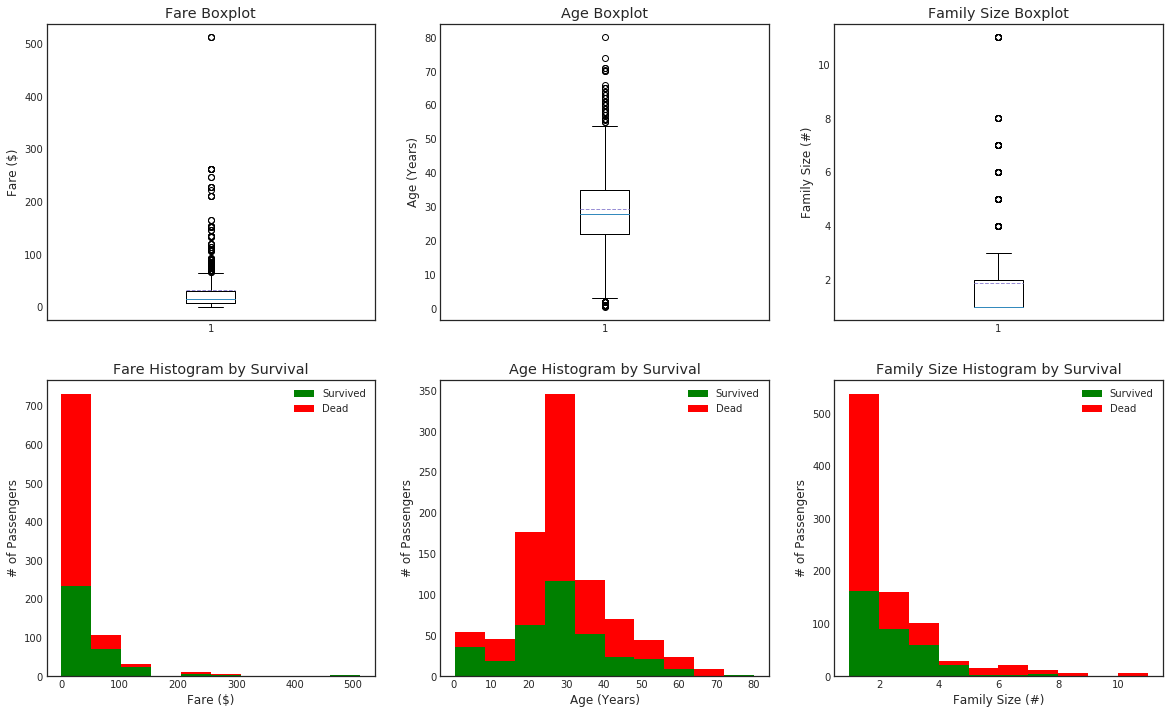

In [13]:
plt.figure(figsize=[20,12])

plt.subplot(231)
plt.boxplot(x=data1['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(data1['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data1['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

plt.subplot(234)
plt.hist(x = [data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()


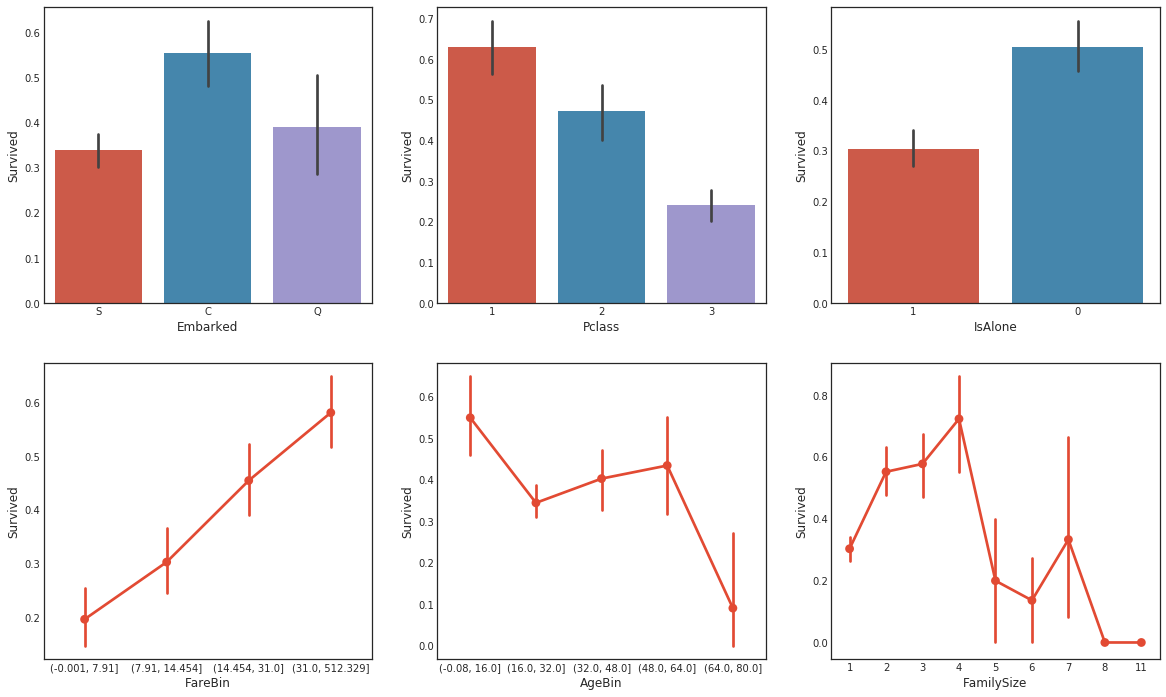

In [14]:
fig, saxis = plt.subplots(2, 3,figsize=(20,12))

sns.barplot(x = 'Embarked', y = 'Survived', data=data1, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=data1, ax = saxis[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=data1, ax = saxis[0,2])

sns.pointplot(x = 'FareBin', y = 'Survived',  data=data1, ax = saxis[1,0])
sns.pointplot(x = 'AgeBin', y = 'Survived',  data=data1, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=data1, ax = saxis[1,2])

Text(0.5,1,'Pclass vs Family Size Survival Comparison')

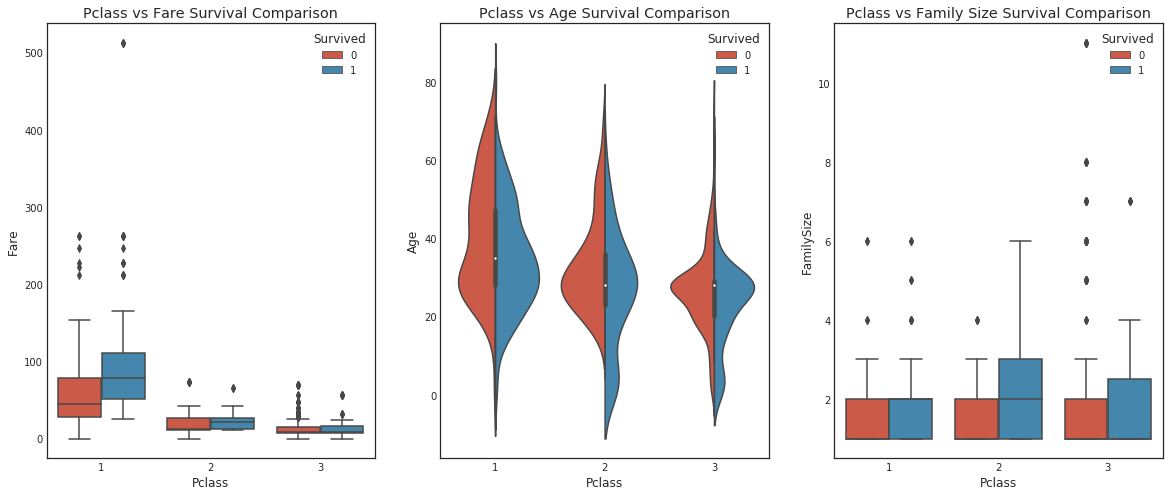

In [15]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(20, 8)) 

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data1, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data1, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = data1, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

Text(0.5,1,'Sex vs IsAlone Survival Comparison')

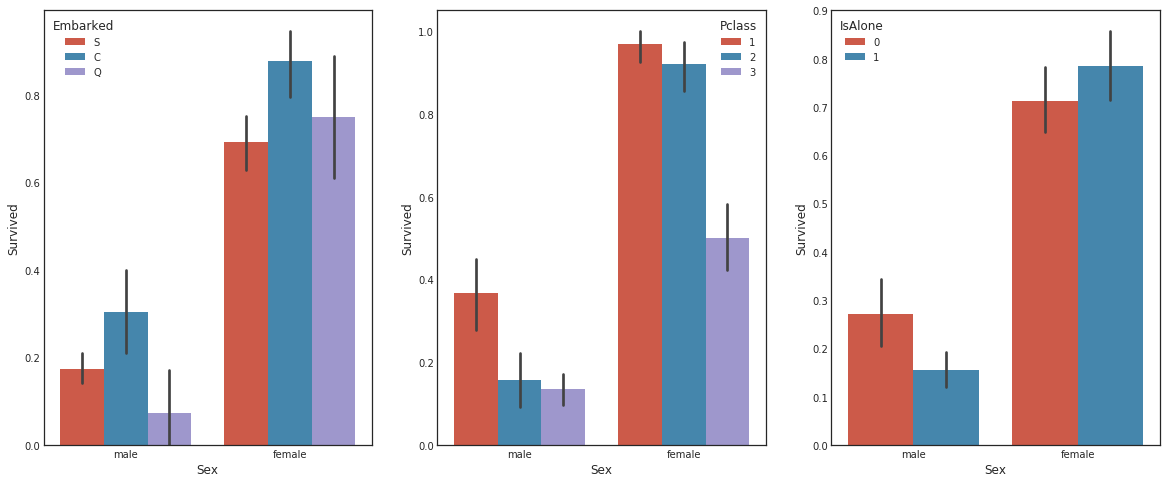

In [16]:
fig, qaxis = plt.subplots(1,3,figsize=(20, 8))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=data1, ax = qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=data1, ax  = qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=data1, ax  = qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')

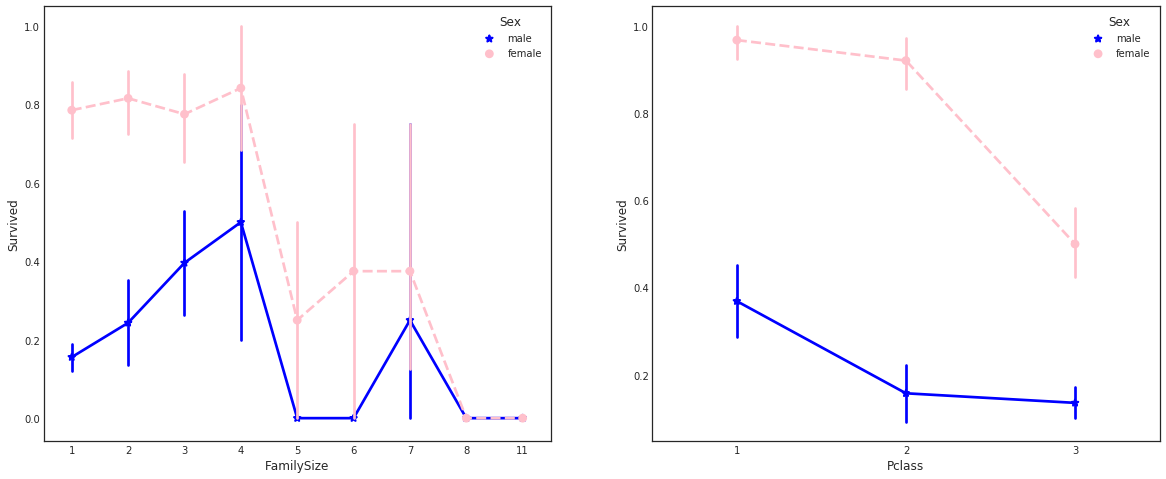

In [17]:
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(20, 8))

#how does family size factor with sex & survival compare
sns.pointplot(x="FamilySize", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

#how does class factor with sex & survival compare
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)

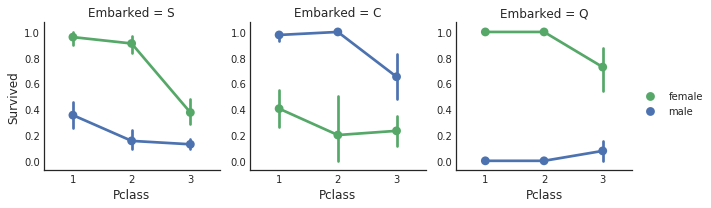

In [18]:
e = sns.FacetGrid(data1, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
e.add_legend()

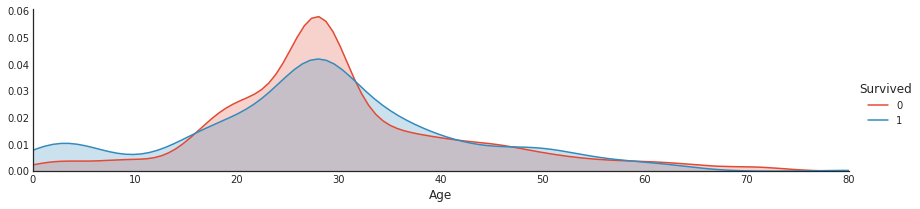

In [19]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( data1, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , data1['Age'].max()))
a.add_legend()

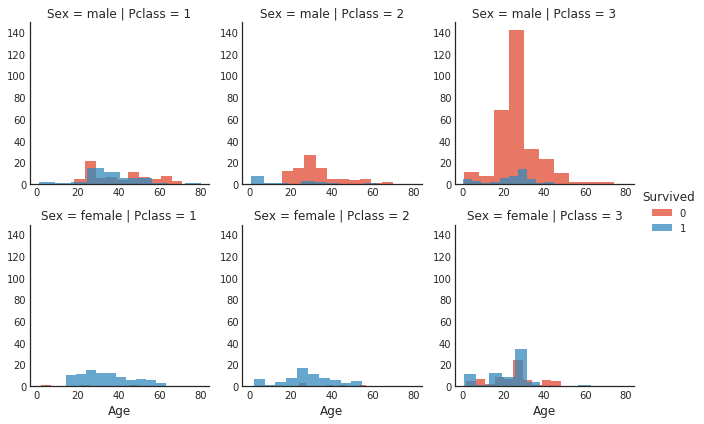

In [20]:
#histogram comparison of sex, class, and age by survival
h = sns.FacetGrid(data1, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

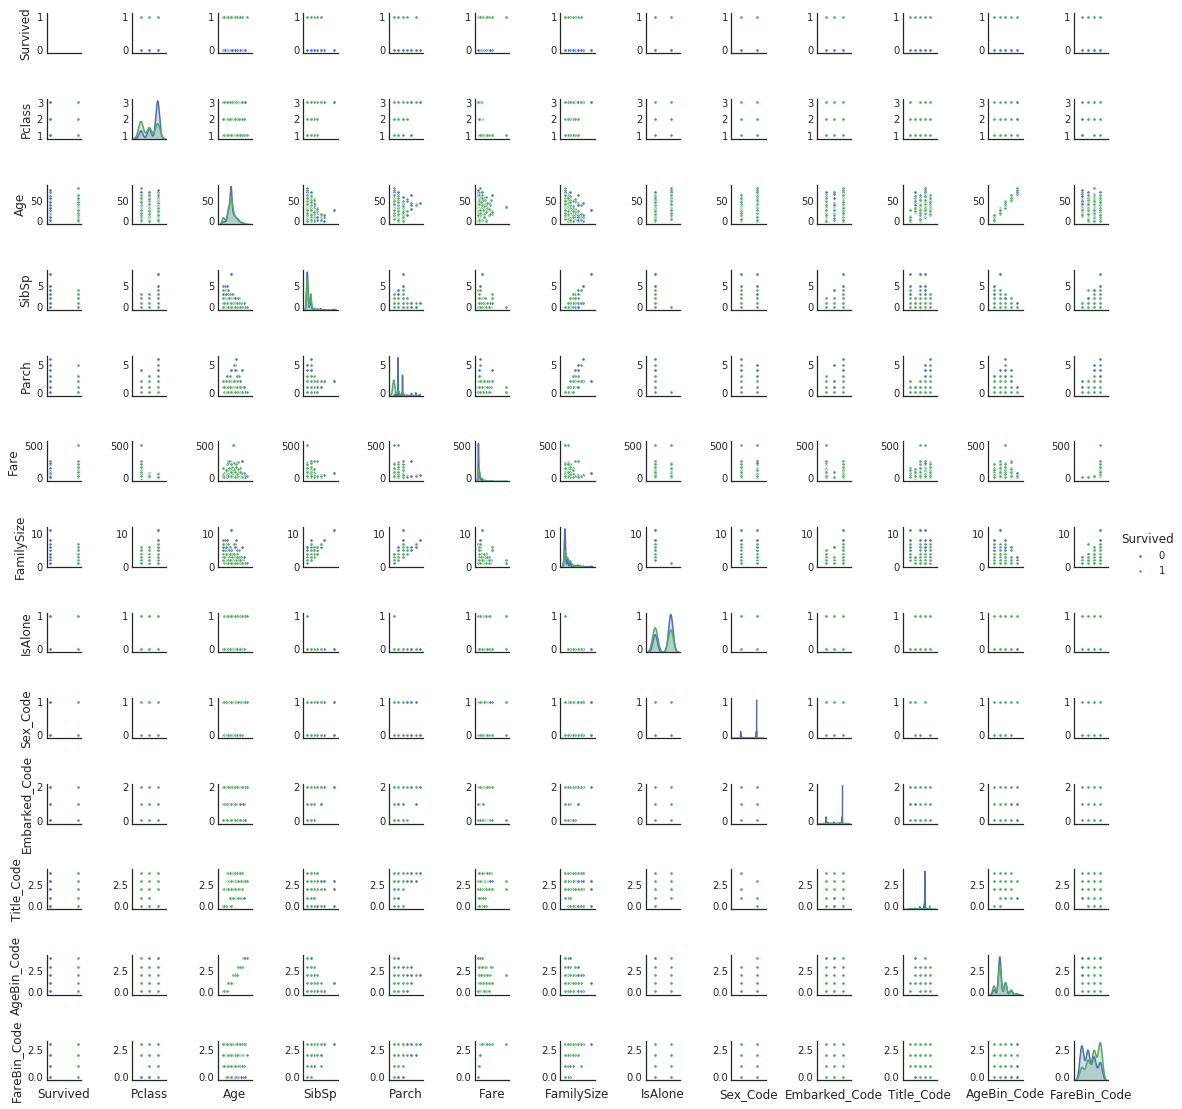

In [21]:
pp = sns.pairplot(data1, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

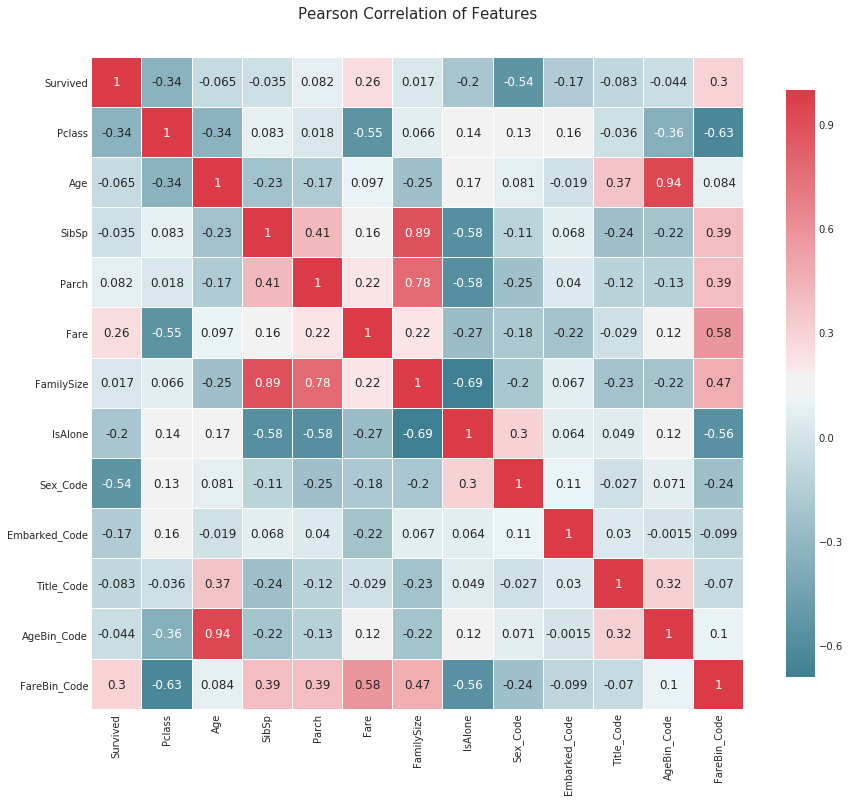

In [22]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(15, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1)

## 10. Model Data
> **`Data Science`** is a `multi-disciplinary field` between `mathematics` (i.e. statistics, linear algebra, etc.), `computer science` (i.e. programming languages, computer systems, etc.) and `business management` (i.e. communication, subject-matter knowledge, etc.). Most data scientist come from one of the three fields, so they tend to lean towards that discipline. However, data science is like a three-legged stool, with no one leg being more important than the other. So, this step will require advanced knowledge in mathematics. But don’t worry, we only need a high-level overview, which we’ll cover in this Kernel. Also, thanks to computer science, a lot of the heavy lifting is done for you. So, problems that once required graduate degrees in mathematics or statistics, now only take a few lines of code. Last, we’ll need some business acumen to think through the problem. After all, like training a sight-seeing dog, it’s learning from us and not the other way around.
>
> **`Machine Learning (ML)`**, as the name suggest, is `teaching the machine how-to think and not what to think`. While the **`Big data`** has been around for decades, it is becoming more popular than ever `because the barrier to entry is lower, for businesses and professionals alike`. This is both good and bad.
>
>>  It’s **`good`** because `these algorithms are now accessible to more people that can solve more problems in the real-world`. 
>
>> It’s **`bad`** because a `lower barrier to entry means, more people will not know the tools they are using and can come to incorrect conclusions`. 
>

`Machine learning` can be categorized as: `supervised learning`, `unsupervised learning`, `semi-supervised learning` and `reinforced learning`. 
- **Supervised learning** is where you train the model by presenting it a training dataset that `includes the correct answer`. 
- **Unsupervised learning** is where you train the model using a training dataset that **`does not`** `include the correct answer`. 
- **Reinforced learning** is a `hybrid` of the previous two, where the model is not given the correct answer immediately, but later after a sequence of events to reinforce learning. We are doing supervised machine learning, because we are training our algorithm by presenting it with a set of features and their corresponding target. We then hope to present it a new subset from the same dataset and have similar results in prediction accuracy.

There are many `machine learning algorithms (MLA)`. However, they can be reduced to `4 main categories`: `Classification, regression, clustering, or dimensionality reduction`, depending on your target variable and data modeling goals. 
- In this dataset, we only focus on **`classification`** and **`regression`**. 
- We can generalize that a `continuous target variable` requires a `regression algorithm` and a `discrete target variable` requires a `classification algorithm`. 
- One side note, `logistic regression`, while it has regression in the name, is really a `classification algorithm`. Since our problem is predicting if a passenger survived or did not survive, this is a discrete target variable. We will use a `classification algorithm` from the **`sklearn`** library to begin our analysis. We will use `cross validation` and `scoring metrics`, discussed in later sections, to rank and compare our `algorithms’ performance`.

**Machine Learning Selection:**
* [Sklearn Estimator Overview](http://scikit-learn.org/stable/user_guide.html)
* [Sklearn Estimator Detail](http://scikit-learn.org/stable/modules/classes.html)
* [Choosing Estimator Mind Map](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
* [Choosing Estimator Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)


Now that we identified our solution as a supervised learning classification algorithm. We can narrow our list of choices.

**Machine Learning Classification Algorithms:**
* [Ensemble Methods](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)
* [Generalized Linear Models (GLM)](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)
* [Naive Bayes](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes)
* [Nearest Neighbors](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors)
* [Support Vector Machines (SVM)](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm)
* [Decision Trees](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree)
* [Discriminant Analysis](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.discriminant_analysis)


### How to Choose a Machine Learning Algorithm (MLA)
**IMPORTANT:** When it comes to data modeling, the beginner’s question is always, `"what is the best machine learning algorithm?"` 

To this the beginner must learn, the [No Free Lunch Theorem (NFLT)](http://robertmarks.org/Classes/ENGR5358/Papers/NFL_4_Dummies.pdf) of Machine Learning. In short, `NFLT states`, there is no super algorithm, that works best in all situations, for all datasets. 
So the best approach is to try multiple `MLAs`, `tune them`, and `compare` them for your specific scenario. With that being said, some good research has been done to compare algorithms, such as :
- [Caruana & Niculescu-Mizil 2006](https://www.cs.cornell.edu/~caruana/ctp/ct.papers/caruana.icml06.pdf) watch [video lecture here](http://videolectures.net/solomon_caruana_wslmw/) of MLA comparisons,
- [Ogutu et al. 2011](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3103196/) done by the NIH for genomic selection, 
- [Fernandez-Delgado et al. 2014](http://jmlr.org/papers/volume15/delgado14a/delgado14a.pdf) comparing 179 classifiers from 17 families,
- [Thoma 2016 sklearn comparison](https://martin-thoma.com/comparing-classifiers/), and there is also a school of thought that says, [more data beats a better algorithm](https://www.kdnuggets.com/2015/06/machine-learning-more-data-better-algorithms.html). 

So with all this information, where is a beginner to start? I recommend starting with [Trees, Bagging, Random Forests, and Boosting](http://jessica2.msri.org/attachments/10778/10778-boost.pdf). They are basically different implementations of a `decision tree`, which is the easiest concept to learn and understand. They are also easier to `tune`, discussed in the next section, than something like `SVM-SVC`. Below, I'll give an overview of how-to run and compare several `MLAs`, but the rest of this file will focus on learning data modeling via `decision trees` and `its derivatives`.

In [23]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

#### split dataset in cross-validation with this splitter class

This is an `alternative to train_test_split`

In [24]:
cv_split = ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) 

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[Target]

#### Index through MLA and save performance to table then print out

In [25]:
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: 
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    
    #save MLA predictions - see section 6 for usage
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    row_index+=1
    
#print and sort table
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
print('MLA_predict')
MLA_compare

MLA_predict


,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.856367,0.829478,0.0527546,0.0213799
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.837266,0.826119,0.0453876,0.0438331
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.891573,0.823134,0.0527903,0.014568
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.835768,0.822761,0.0493681,0.053056
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.866667,0.822015,0.0529916,0.0576766
17,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.895131,0.822015,0.0557571,0.00168304
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.891011,0.819403,0.0515898,0.0151595
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.895131,0.819403,0.0534976,0.0138734
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.850375,0.813806,0.0690863,0.00164492
18,ExtraTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.895131,0.81306,0.0681734,0.00143931


Text(0,0.5,'Algorithm')

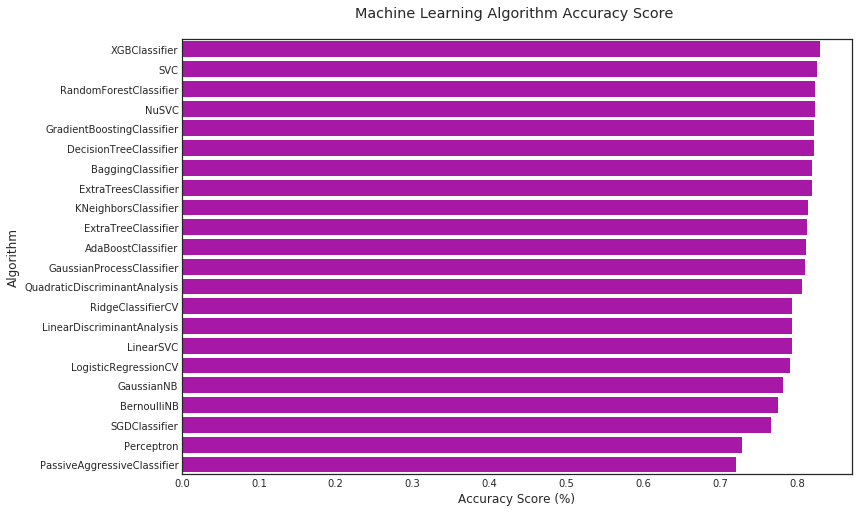

In [26]:
#barplot using
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

<a id="ch8"></a>
## Evaluate Model Performance
Let's recap, with some basic data cleaning, analysis, and machine learning algorithms (MLA), we are able to predict passenger survival with ~82% accuracy. Not bad for a few lines of code. But the question we always ask is, can we do better and more importantly get an ROI (return on investment) for our time invested? For example, if we're only going to increase our accuracy by 1/10th of a percent, is it really worth 3-months of development. If you work in research maybe the answer is yes, but if you work in business mostly the answer is no. So, keep that in mind when improving your model.

### Determine a `Baseline Accuracy` ###
Before we decide how-to make our model better, let's determine if our model is even worth keeping. We know this is a `binary problem`, because there are only two possible outcomes; passengers `survived or died`. So, think of it like a coin flip problem. If you have a fair coin and you guessed heads or tail, then you have a 50-50 chance of guessing correct. So, let's set 50% as the worst model performance; because anything lower than that, then why do I need you when I can just flip a coin?

Okay, so with no information about the dataset, we can always get 50% with a binary problem. But we have information about the dataset, so we should be able to do better. We know that 1,502/2,224 or 67.5% of people died. Therefore, if we just predict the most frequent occurrence, that 100% of people died, then we would be right 67.5% of the time. So, let's set 68% as bad model performance, because again, anything lower than that, then why do I need you, when I can just predict using the most frequent occurrence.

### How-to Create Your Own Model ###
Our `accuracy` is `increasing`, but can we do better? Are there any signals in our data? 

To illustrate this, we're going to build our own `decision tree` model, because it is the easiest to `conceptualize` and requires simple `addition` and `multiplication calculations`. When creating a `decision tree`, you want to `ask questions` that **`segment`** your `target response`, placing the `survived/1` and `dead/0` into `homogeneous subgroups`. This is part science and part art.

Remember, the task is to create `subgroups` using a `decision tree model` to get `survived/1` in `one bucket` and `dead/0` in `another bucket`. Our rule of thumb will be the `majority rules`. 

Meaning, if the `majority` `or 50% or more survived`, then `everybody in our subgroup survived/1`, *but if 50% or less survived then if everybody in our subgroup died/0. Also, we will stop if the subgroup is less than 10 and/or our model accuracy plateaus or decreases*

***`Question 1: Were you on the Titanic?`*** If *Yes*, then `majority (62%) died`. Note our sample survival is different than our `population of 68%`. Nonetheless, if we assumed everybody died, our sample accuracy is `62%`.

***`Question 2: Are you male or female?`*** If *Male*, `majority (81%) died`. *Female*, `majority (74%) survived`. Giving us an `accuracy` of `79%`.

***`Question 3A (going down the female branch with count = 314)`: Are you in `class 1, 2, or 3`?*** 
> *Class 1*, `majority (97%) survived` and `Class 2, majority (92%) survived`. Since the `dead subgroup is less than 10`, we will **stop going down** `this branch`. 
>
> *Class 3*, is even at a `50-50 split`. **No new information to improve our model is gained**.

***`Question 4A (going down the female class 3 branch with count = 144): Did you embark from port C, Q, or S?`*** 
> We gain a `little information`. `C and Q`, the `majority still survived`, so **`no change`**. 
>
> Also, the `dead subgroup` is less than 10, so we will **stop**. 
>
> `S`, the `majority (63%) died`. So, we will **change `females`, `class 3`**, 

`embarked S` from assuming they `survived`, to assuming they died. Our model `accuracy increases to 81%`. 

***`Question 5A (going down the female class 3 embarked S branch with count = 88):`*** 

So far, it looks like we made `good decisions`. `Adding another level does not seem to gain much more information`. 

`This subgroup 55 died and 33 survived`, since `majority died` we need to find a `signal to identify the 33 (survied)` or a `subgroup to change them from dead to survived` and improve our model accuracy. 

We can play with our features. One I found was `fare 0-8`, `majority survived`. It's a `small sample size 11-9`, `but one often used in statistics`. `We slightly improve our accuracy, but not much to move us past 82%`. So, we'll stop here.

***`Question 3B (going down the male branch with count = 577):`*** 

Going back to `question 2`, we know the majority of `males died`. So, we are looking for a feature that identifies a subgroup that `majority survived`. 

Surprisingly, `class or even embarked didn't matter like it did for females`, **but title does and gets us to 82%**. 

Guess and checking other features, none seem to push us `past 82%`. So, we'll **stop here for now**.

We did it, `with very little information`, we get to `82% accuracy`. On a `worst`, `bad`, `good`, `better`, and `best scale`, we'll set `82% to good`, since it's a simple model that yields us decent results. But the question still remains, can we do better than our handmade model? 

Before we do, let's code what we just wrote above. Please note, this is a manual process created by `"hand."` 

We won't have to do this, but it's important to understand it before you start working with MLA. 

Reference: [Cross-Validation and Decision Tree Tutorial](http://www.cs.utoronto.ca/~fidler/teaching/2015/slides/CSC411/tutorial3_CrossVal-DTs.pdf)

In [27]:
#IMPORTANT: This is a handmade model for learning purposes only.
# However, it is possible to create your own predictive model without a fancy algorithm
#coin flip model with random 1/survived 0/died
#iterate over dataFrame rows as (index, Series) pairs:

for index, row in data1.iterrows(): 
    #random number generator: https://docs.python.org/2/library/random.html
    if random.random() > .5:     # Random float x, 0.0 <= x < 1.0    
        data1.set_value(index, 'Random_Predict', 1) #predict survived/1
    else: 
        data1.set_value(index, 'Random_Predict', 0) #predict died/0

In [28]:
# score random guess of survival. Use shortcut 1 = Right Guess and 0 = Wrong Guess
# the mean of the column will then equal the accuracy
data1['Random_Score'] = 0 #assume prediction wrong
data1.loc[(data1['Survived'] == data1['Random_Predict']), 'Random_Score'] = 1 #set to 1 for correct prediction
print('Coin Flip Model Accuracy: {:.2f}%'.format(data1['Random_Score'].mean()*100))

#we can also use scikit's accuracy_score function to save us a few lines of code
print('Coin Flip Model Accuracy w/SciKit: {:.2f}%'.format(metrics.accuracy_score(data1['Survived'], data1['Random_Predict'])*100))

Coin Flip Model Accuracy: 50.73%
Coin Flip Model Accuracy w/SciKit: 50.73%


#### Group by or pivot table:

In [29]:
pivot_female = data1[data1.Sex=='female'].groupby(['Sex','Pclass', 'Embarked','FareBin'])['Survived'].mean()
print('Survival Decision Tree w/Female Node: \n',pivot_female)

pivot_male = data1[data1.Sex=='male'].groupby(['Sex','Title'])['Survived'].mean()
print('\n\nSurvival Decision Tree w/Male Node: \n',pivot_male)

Survival Decision Tree w/Female Node: 
 Sex     Pclass  Embarked  FareBin        
female  1       C         (14.454, 31.0]     0.666667
                          (31.0, 512.329]    1.000000
                Q         (31.0, 512.329]    1.000000
                S         (14.454, 31.0]     1.000000
                          (31.0, 512.329]    0.955556
        2       C         (7.91, 14.454]     1.000000
                          (14.454, 31.0]     1.000000
                          (31.0, 512.329]    1.000000
                Q         (7.91, 14.454]     1.000000
                S         (7.91, 14.454]     0.875000
                          (14.454, 31.0]     0.916667
                          (31.0, 512.329]    1.000000
        3       C         (-0.001, 7.91]     1.000000
                          (7.91, 14.454]     0.428571
                          (14.454, 31.0]     0.666667
                Q         (-0.001, 7.91]     0.750000
                          (7.91, 14.454]     0.500000


In [30]:
def mytree(df):
    
    #initialize table to store predictions
    Model = pd.DataFrame(data = {'Predict':[]})
    male_title = ['Master'] #survived titles

    for index, row in df.iterrows():

        #Question 1: Were you on the Titanic; majority died
        Model.loc[index, 'Predict'] = 0

        #Question 2: Are you female; majority survived
        if (df.loc[index, 'Sex'] == 'female'):
                  Model.loc[index, 'Predict'] = 1

        #Question 3A Female - Class and Question 4 Embarked gain minimum information

        #Question 5B Female - FareBin; set anything less than .5 in female node decision tree back to 0       
        if ((df.loc[index, 'Sex'] == 'female') & 
            (df.loc[index, 'Pclass'] == 3) & 
            (df.loc[index, 'Embarked'] == 'S')  &
            (df.loc[index, 'Fare'] > 8)

           ):
                  Model.loc[index, 'Predict'] = 0

        #Question 3B Male: Title; set anything greater than .5 to 1 for majority survived
        if ((df.loc[index, 'Sex'] == 'male') &
            (df.loc[index, 'Title'] in male_title)
            ):
            Model.loc[index, 'Predict'] = 1
        
        
    return Model


#model data
Tree_Predict = mytree(data1)
print('Decision Tree Model Accuracy/Precision Score: {:.2f}%\n'.format(metrics.accuracy_score(data1['Survived'], Tree_Predict)*100))


# Accuracy Summary Report 
print(metrics.classification_report(data1['Survived'], Tree_Predict))

Decision Tree Model Accuracy/Precision Score: 82.04%

             precision    recall  f1-score   support

          0       0.82      0.91      0.86       549
          1       0.82      0.68      0.75       342

avg / total       0.82      0.82      0.82       891



Confusion matrix, without normalization
[[497  52]
 [108 234]]
Normalized confusion matrix
[[ 0.91  0.09]
 [ 0.32  0.68]]


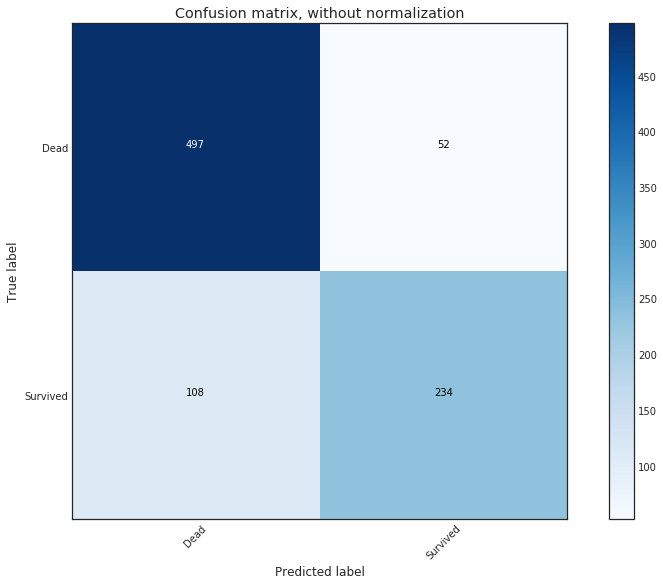

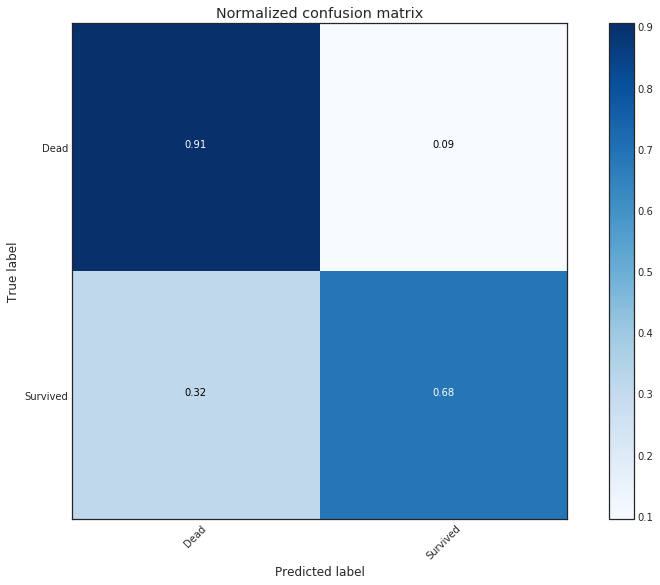

In [31]:
#Plot Accuracy Summary
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(data1['Survived'], Tree_Predict)
np.set_printoptions(precision=2)

class_names = ['Dead', 'Survived']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, 
                      title='Normalized confusion matrix')



## Model Performance with Cross-Validation (CV)
In step 5.0, we used [sklearn cross_validate](http://scikit-learn.org/stable/modules/cross_validation.html#multimetric-cross-validation) function to train, test, and score our model performance.

Remember, it's important we use a different subset for train data to build our model and test data to evaluate our model. Otherwise, our model will be overfitted. Meaning it's great at "predicting" data it's already seen, but terrible at predicting data it has not seen; which is not prediction at all. It's like cheating on a school quiz to get 100%, but then when you go to take the exam, you fail because you never truly learned anything. The same is true with machine learning.

CV is basically a shortcut to split and score our model multiple times, so we can get an idea of how well it will perform on unseen data. It’s a little more expensive in computer processing, but it's important so we don't gain false confidence. This is helpful in a Kaggle Competition or any use case where consistency matters and surprises should be avoided.
 
In addition to CV, we used a customized [sklearn train test splitter](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection), to allow a little more randomness in our test scoring. Below is an image of the default CV split.

<a id="ch9"></a>
## Tune Model with Hyper-Parameters
When we used [sklearn Decision Tree (DT) Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), we accepted all the function defaults. This leaves opportunity to see how various hyper-parameter settings will change the model accuracy.  [(Click here to learn more about parameters vs hyper-parameters.)](https://www.youtube.com/watch?v=EJtTNboTsm8)

However, in order to tune a model, we need to actually understand it. That's why I took the time in the previous sections to show you how predictions work. Now let's learn a little bit more about our DT algorithm.

Credit: [sklearn](http://scikit-learn.org/stable/modules/tree.html#classification)

>**Some advantages of decision trees are:**
* Simple to understand and to interpret. Trees can be visualized.
* Requires little data preparation. Other techniques often require data normalization, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
* The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
* Able to handle both numerical and categorical data. Other techniques are usually specialized in analyzing datasets that have only one type of variable. See algorithms for more information.
* Able to handle multi-output problems.
* Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by Boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
* Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
* Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

> **The disadvantages of decision trees include:**
- **`Decision-tree learners`** can create over-complex trees that do not generalize the data well. This is called overfitting. Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
- **`Decision trees`** can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.
- The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.
- There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.
- Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

Below are available `hyper-parameters` and [defintions](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier):

            class sklearn.tree.DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)


We will tune our model using: 
- [ParameterGrid](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html#sklearn.model_selection.ParameterGrid), 
- [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV), and customized [sklearn scoring](http://scikit-learn.org/stable/modules/model_evaluation.html); [click here to learn more about ROC_AUC scores](http://www.dataschool.io/roc-curves-and-auc-explained/). 

We will then visualize our tree with [graphviz](http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz). [Click here to learn more about ROC_AUC scores](http://www.dataschool.io/roc-curves-and-auc-explained/).


### Base model

In [32]:
dtree = tree.DecisionTreeClassifier(random_state = 0)
base_results = model_selection.cross_validate(dtree, data1[data1_x_bin], data1[Target], cv  = cv_split)
dtree.fit(data1[data1_x_bin], data1[Target])

print('BEFORE DT Parameters: ', dtree.get_params())
print("BEFORE DT Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))

BEFORE DT Parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 0, 'splitter': 'best'}
BEFORE DT Training w/bin score mean: 89.51
BEFORE DT Test w/bin score mean: 82.09
BEFORE DT Test w/bin score 3*std: +/- 5.57


### Tuning hyper-parameters.

In [33]:
param_grid = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              #'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
              'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
              'random_state': [0] #seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
             }

tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split)
tune_model.fit(data1[data1_x_bin], data1[Target])

print('AFTER DT Parameters: ', tune_model.best_params_)

print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 

print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))

AFTER DT Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT Training w/bin score mean: 89.35
AFTER DT Test w/bin score mean: 87.40
AFTER DT Test w/bin score 3*std: +/- 5.00


<a id="ch10"></a>
## Tuning Model with `Feature Selection`
As stated in the beginning, more predictor variables do not make a better model, but the right predictors do. So another step in data modeling is feature selection. has several options, we will use `recursive feature elimination (RFE)` with `cross validation (CV)`


### Base model

In [34]:
print('BEFORE DT RFE Training Shape Old: ', data1[data1_x_bin].shape) 
print('BEFORE DT RFE Training Columns Old: ', data1[data1_x_bin].columns.values)

print("BEFORE DT RFE Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT RFE Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT RFE Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))

BEFORE DT RFE Training Shape Old:  (891, 7)
BEFORE DT RFE Training Columns Old:  ['Sex_Code' 'Pclass' 'Embarked_Code' 'Title_Code' 'FamilySize'
 'AgeBin_Code' 'FareBin_Code']
BEFORE DT RFE Training w/bin score mean: 89.51
BEFORE DT RFE Test w/bin score mean: 82.09
BEFORE DT RFE Test w/bin score 3*std: +/- 5.57


### Feature selection

> transform `x`&`y` to reduced features and fit new model
>
> alternative: can use pipeline to reduce fit and transform steps:


In [35]:
dtree_rfe = feature_selection.RFECV(dtree, step = 1, scoring = 'accuracy', cv = cv_split)
dtree_rfe.fit(data1[data1_x_bin], data1[Target])
X_rfe = data1[data1_x_bin].columns.values[dtree_rfe.get_support()]
rfe_results = model_selection.cross_validate(dtree, data1[X_rfe], data1[Target], cv  = cv_split)
print('AFTER DT RFE Training Shape New: ', data1[X_rfe].shape) 
print('AFTER DT RFE Training Columns New: ', X_rfe)
print("AFTER DT RFE Training w/bin score mean: {:.2f}". format(rfe_results['train_score'].mean()*100)) 
print("AFTER DT RFE Test w/bin score mean: {:.2f}". format(rfe_results['test_score'].mean()*100))
print("AFTER DT RFE Test w/bin score 3*std: +/- {:.2f}". format(rfe_results['test_score'].std()*100*3))

AFTER DT RFE Training Shape New:  (891, 6)
AFTER DT RFE Training Columns New:  ['Sex_Code' 'Pclass' 'Title_Code' 'FamilySize' 'AgeBin_Code' 'FareBin_Code']
AFTER DT RFE Training w/bin score mean: 88.16
AFTER DT RFE Test w/bin score mean: 83.06
AFTER DT RFE Test w/bin score 3*std: +/- 6.22


### Tuning `rfe model`

In [36]:
rfe_tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split)
rfe_tune_model.fit(data1[X_rfe], data1[Target])
print('AFTER DT RFE Tuned Parameters: ', rfe_tune_model.best_params_)
print("AFTER DT RFE Tuned Training w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
print("AFTER DT RFE Tuned Test w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT RFE Tuned Test w/bin score 3*std: +/- {:.2f}". format(rfe_tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))

AFTER DT RFE Tuned Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT RFE Tuned Training w/bin score mean: 89.39
AFTER DT RFE Tuned Test w/bin score mean: 87.34
AFTER DT RFE Tuned Test w/bin score 3*std: +/- 6.21


#### Graph MLA version of Decision Tree:

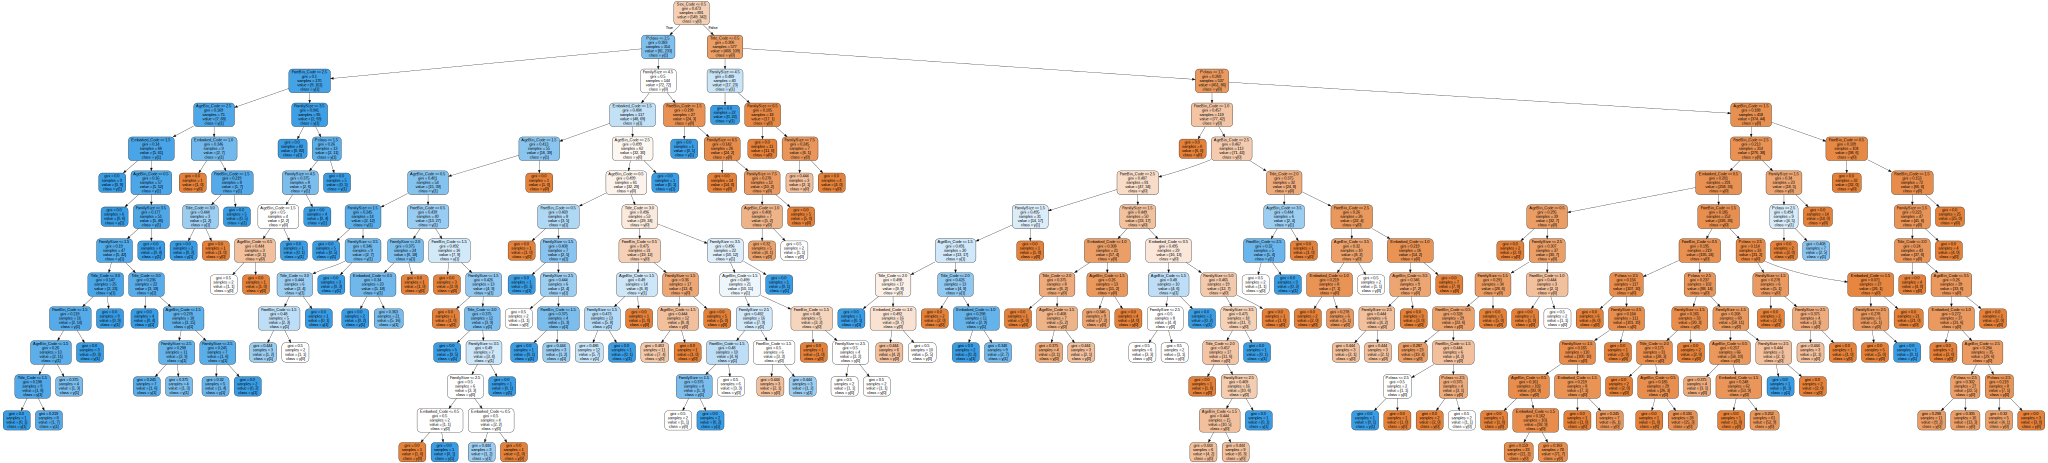

In [37]:
import graphviz 
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names = data1_x_bin, class_names = True,
                                filled = True, rounded = True)
graph = graphviz.Source(dot_data) 
graph

## Validate and Implement
The next step is to prepare for submission using the validation data. 

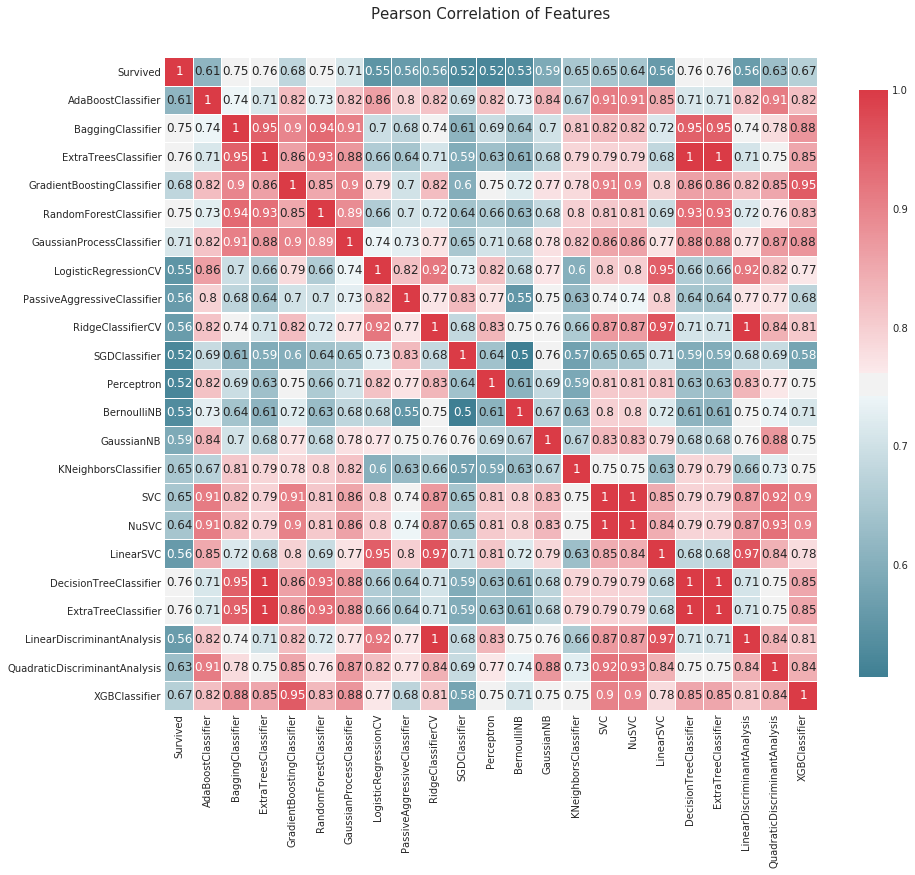

In [38]:
correlation_heatmap(MLA_predict)

**why choose one model, when you can pick them all with voting classifier & removed models w/o attribute 'predict_proba' required for vote classifier and models with a 1.0 correlation to another model?**

In [39]:
vote_est = [
    #Ensemble Methods: http://scikit-learn.org/stable/modules/ensemble.html
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),

    #Gaussian Processes: http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    
    #GLM: http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    ('lr', linear_model.LogisticRegressionCV()),
    
    #Navies Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html
    ('bnb', naive_bayes.BernoulliNB()),
    ('gnb', naive_bayes.GaussianNB()),
    
    #Nearest Neighbor: http://scikit-learn.org/stable/modules/neighbors.html
    ('knn', neighbors.KNeighborsClassifier()),
    
    #SVM: http://scikit-learn.org/stable/modules/svm.html
    ('svc', svm.SVC(probability=True)),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
   ('xgb', XGBClassifier())

]

#### Hard Vote or majority rules

In [40]:
vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, data1[data1_x_bin], data1[Target], cv  = cv_split)
vote_hard.fit(data1[data1_x_bin], data1[Target])

print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))

Hard Voting Training w/bin score mean: 86.57
Hard Voting Test w/bin score mean: 82.13
Hard Voting Test w/bin score 3*std: +/- 4.55


#### Soft Vote or weighted probabilities

In [41]:
vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, data1[data1_x_bin], data1[Target], cv  = cv_split)
vote_soft.fit(data1[data1_x_bin], data1[Target])

print("Soft Voting Training w/bin score mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))

Soft Voting Training w/bin score mean: 87.21
Soft Voting Test w/bin score mean: 82.35
Soft Voting Test w/bin score 3*std: +/- 4.19


In [42]:
grid_n_estimator = [50,100,300]
grid_ratio = [.1,.25,.5,.75,1.0]
grid_learn = [.01,.03,.05,.1,.25]
grid_max_depth = [2,4,6,None]
grid_min_samples = [5,10,.03,.05,.10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]

vote_param = [{
            ## adaboost
            'ada__n_estimators': grid_n_estimator,
            'ada__learning_rate': grid_ratio,
            'ada__algorithm': ['SAMME', 'SAMME.R'],
            'ada__random_state': grid_seed,
    
            # bagging classifier
            'bc__n_estimators': grid_n_estimator,
            'bc__max_samples': grid_ratio,
            'bc__oob_score': grid_bool, 
            'bc__random_state': grid_seed,
            
            # ExtraTreeClassifier
            'etc__n_estimators': grid_n_estimator,
            'etc__criterion': grid_criterion,
            'etc__max_depth': grid_max_depth,
            'etc__random_state': grid_seed,

            ## GradientBoostingClassifier
            'gbc__loss': ['deviance', 'exponential'],
            'gbc__learning_rate': grid_ratio,
            'gbc__n_estimators': grid_n_estimator,
            'gbc__criterion': ['friedman_mse', 'mse', 'mae'],
            'gbc__max_depth': grid_max_depth,
            'gbc__min_samples_split': grid_min_samples,
            'gbc__min_samples_leaf': grid_min_samples,      
            'gbc__random_state': grid_seed,
    
            # RandomForestClassifier
            'rfc__n_estimators': grid_n_estimator,
            'rfc__criterion': grid_criterion,
            'rfc__max_depth': grid_max_depth,
            'rfc__min_samples_split': grid_min_samples,
            'rfc__min_samples_leaf': grid_min_samples,   
            'rfc__bootstrap': grid_bool,
            'rfc__oob_score': grid_bool, 
            'rfc__random_state': grid_seed,
        
            #LogisticRegressionCV
            'lr__fit_intercept': grid_bool,
            'lr__penalty': ['l1','l2'],
            'lr__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'lr__random_state': grid_seed,
            
            ## bernoulli NB
            'bnb__alpha': grid_ratio,
            'bnb__prior': grid_bool,
            'bnb__random_state': grid_seed,
    
            ## Knn
            'knn__n_neighbors': [1,2,3,4,5,6,7],
            'knn__weights': ['uniform', 'distance'],
            'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'knn__random_state': grid_seed,
            
            ## SVM - SVC
            'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'svc__C': grid_max_depth,
            'svc__gamma': grid_ratio,
            'svc__decision_function_shape': ['ovo', 'ovr'],
            'svc__probability': [True],
            'svc__random_state': grid_seed,
    
            ## xgboost
            'xgb__learning_rate': grid_ratio,
            'xgb__max_depth': [2,4,6,8,10],
            'xgb__tree_method': ['exact', 'approx', 'hist'],
            'xgb__objective': ['reg:linear', 'reg:logistic', 'binary:logistic'],
            'xgb__seed': grid_seed    

        }]

#### Hyperparameter Tune with GridSearchCV

In [43]:
grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]


grid_param = [
            [{
            #AdaBoostClassifier 
            'n_estimators': grid_n_estimator, #default=50
            'learning_rate': grid_learn, #default=1
            #'algorithm': ['SAMME', 'SAMME.R'], #default=’SAMME.R
            'random_state': grid_seed
            }],
       
            [{
            #BaggingClassifier 
            'n_estimators': grid_n_estimator, #default=10
            'max_samples': grid_ratio, #default=1.0
            'random_state': grid_seed
             }],

            [{
            #ExtraTreesClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'random_state': grid_seed
             }],

            [{
            #GradientBoostingClassifier
            #'loss': ['deviance', 'exponential'], #default=’deviance’
            'learning_rate': [.05], #default=0.1
            'n_estimators': [300], #default=100 
            #'criterion': ['friedman_mse', 'mse', 'mae'], #default=”friedman_mse”
            'max_depth': grid_max_depth, #default=3   
            'random_state': grid_seed
             }],
   
            [{
            #RandomForestClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'oob_score': [True], #default=False
            'random_state': grid_seed
             }],
    
            [{    
            #GaussianProcessClassifier
            'max_iter_predict': grid_n_estimator, #default: 100
            'random_state': grid_seed
            }],
        
            [{
            #LogisticRegressionCV
            'fit_intercept': grid_bool, #default: True
            #'penalty': ['l1','l2'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
            'random_state': grid_seed
             }],
            
            [{
            #BernoulliNB
            'alpha': grid_ratio, #default: 1.0
             }],
            #GaussianNB - 
            [{ }],
    
            [{
            #KNeighborsClassifier
            'n_neighbors': [1,2,3,4,5,6,7], #default: 5
            'weights': ['uniform', 'distance'], #default = ‘uniform’
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }],
               
            [{
            #SVC :'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'kernel': ['linear', 'rbf'],
            'C': [1,2,3,4,5], #default=1.0
            'gamma': grid_ratio, #edfault: auto
            'decision_function_shape': ['ovo', 'ovr'], #default:ovr
            'probability': [True],
            'random_state': grid_seed
             }],  
            [{
            #XGBClassifier
            'learning_rate': grid_learn, #default: .3
            'max_depth': [1,2,4,6,8,10], #default 2
            'n_estimators': grid_n_estimator, 
            'seed': grid_seed  
             }]   
        ]

In [44]:
start_total = time.perf_counter()
for clf, param in zip (vote_est, grid_param): 
    start = time.perf_counter()        
    best_search = model_selection.GridSearchCV(estimator = clf[1], param_grid = param, cv = cv_split, scoring = 'roc_auc')
    best_search.fit(data1[data1_x_bin], data1[Target])
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param) 

run_total = time.perf_counter() - start_total
print('Total optimization time was {:.2f} minutes.'.format(run_total/60))

The best parameter for AdaBoostClassifier is {'learning_rate': 0.1, 'n_estimators': 300, 'random_state': 0} with a runtime of 37.29 seconds.
The best parameter for BaggingClassifier is {'max_samples': 0.25, 'n_estimators': 300, 'random_state': 0} with a runtime of 34.24 seconds.
The best parameter for ExtraTreesClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'random_state': 0} with a runtime of 76.24 seconds.
The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 35.86 seconds.
The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 87.27 seconds.
The best parameter for GaussianProcessClassifier is {'max_iter_predict': 10, 'random_state': 0} with a runtime of 5.78 seconds.
The best parameter for LogisticRegressionCV is {'fit_intercept': True, 'random_stat

#### Hard Vote or majority rules w/Tuned Hyperparameters

In [45]:
grid_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
grid_hard_cv = model_selection.cross_validate(grid_hard, data1[data1_x_bin], data1[Target], cv  = cv_split)
grid_hard.fit(data1[data1_x_bin], data1[Target])

print("Hard Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_hard_cv['train_score'].mean()*100)) 
print("Hard Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))
print("Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_hard_cv['test_score'].std()*100*3))
print('-'*10)

Hard Voting w/Tuned Hyperparameters Training w/bin score mean: 85.22
Hard Voting w/Tuned Hyperparameters Test w/bin score mean: 82.31
Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 5.26
----------


### Soft Vote or weighted probabilities w/Tuned Hyperparameters

In [46]:
grid_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
grid_soft_cv = model_selection.cross_validate(grid_soft, data1[data1_x_bin], data1[Target], cv  = cv_split)
grid_soft.fit(data1[data1_x_bin], data1[Target])
print("Soft Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_soft_cv['train_score'].mean()*100)) 
print("Soft Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))
print("Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_soft_cv['test_score'].std()*100*3))
print('-'*10)

Soft Voting w/Tuned Hyperparameters Training w/bin score mean: 84.76
Soft Voting w/Tuned Hyperparameters Test w/bin score mean: 82.28
Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 5.42
----------


### Submit

In [47]:
print(data_val.info())
print("-"*10)
data_val['Survived'] = mytree(data_val).astype(int)
data_val['Survived'] = grid_hard.predict(data_val[data1_x_bin])
submit = data_val[['PassengerId','Survived']]
submit.to_csv("../working/submit.csv", index=False)
print('Validation Data Distribution: \n', data_val['Survived'].value_counts(normalize = True))
submit.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
PassengerId      418 non-null int64
Pclass           418 non-null int64
Name             418 non-null object
Sex              418 non-null object
Age              418 non-null float64
SibSp            418 non-null int64
Parch            418 non-null int64
Ticket           418 non-null object
Fare             418 non-null float64
Cabin            91 non-null object
Embarked         418 non-null object
FamilySize       418 non-null int64
IsAlone          418 non-null int64
Title            418 non-null object
FareBin          418 non-null category
AgeBin           418 non-null category
Sex_Code         418 non-null int64
Embarked_Code    418 non-null int64
Title_Code       418 non-null int64
AgeBin_Code      418 non-null int64
FareBin_Code     418 non-null int64
dtypes: category(2), float64(2), int64(11), object(6)
memory usage: 63.1+ KB
None
----------
Validation Data Distribution: 


,PassengerId,Survived
39,931,0
42,934,0
136,1028,0
382,1274,1
149,1041,0
59,951,1
11,903,0
93,985,0
230,1122,0
80,972,0
